In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv")

df.head(2)


,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2432484,23612,0,0,6670
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3633776,135387,0,0,23401


-   Now, let's identify videos with highest view count by channel name

In [17]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [18]:
top_10_viewed = df.pivot_table(index='title', values='view_count', aggfunc='sum').sort_values('view_count', ascending=False).head(10)
top_10_viewed = top_10_viewed.reset_index()
top_10_viewed['view_count'] = pd.to_numeric(top_10_viewed['view_count'])

top_10_viewed

,title,view_count
0,I Spent 100 Hours Inside The Pyramids!,149891483
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,93651799
2,100 People Trapped Inside 100 Circles For $500...,35656599
3,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,27351828
4,"JENNIE, Doechii - ExtraL (Official Video)",23016618
5,"Karan Aujla, OneRepublic, Disha Patani, Ikky -...",22256863
6,A Minecraft Movie | Final Trailer,20284127
7,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,20180753
8,G-DRAGON - DRAMA (Official Video),17544614
9,IS THIS THE BEST BRAWLER EVER?!,15006427


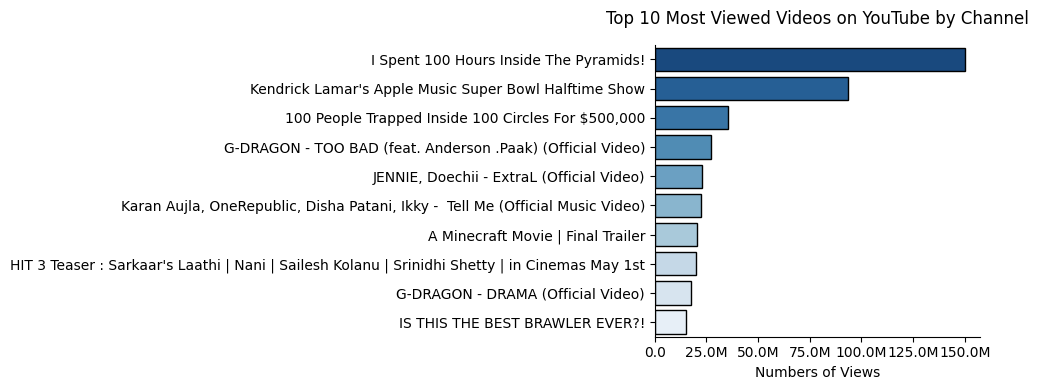

In [30]:
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_viewed, 
            x='view_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Viewed Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')


sns.despine()
plt.tight_layout()
plt.show()

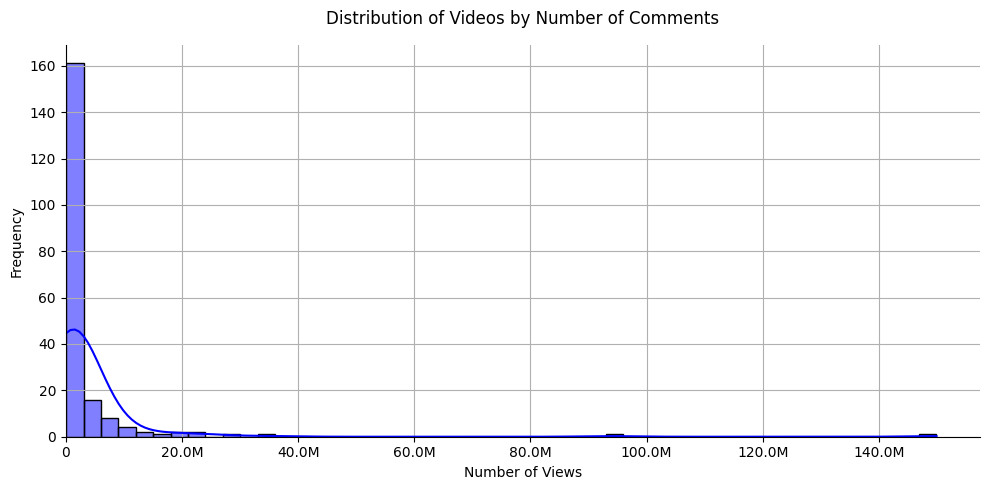

In [31]:
# videos distribution by views
plt.figure(figsize=(10, 5))

sns.histplot(data=df,
             x='view_count',
             bins=50,
             kde=True,
             palette='Blues_r',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments', pad=15)
plt.ylabel('Frequency')
plt.xlabel('Number of Views')

plt.grid(True)
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()